In [12]:
#%The supercell gemoetry
import math
import meep as mp

#na = 1
#r = 0.0725
#n = math.sqrt(32)
def DiamondLattice(n,r,nx,ny,nz,ax,ay,az):
    #
    L = math.sqrt(3)/4.0
    hs = math.sqrt(3)/12.0

    geometry_lattice = mp.Lattice(size=mp.Vector3(nx*ax,ny*ay,nz*az))
    #v1 = mp.Vector3(1)

    #displace vector to fill the whole supercell
    v2 = mp.Vector3(0.5*ax,0.5*ay,0)
    v1 = mp.Vector3(0,ay*1.0/3.0,az*1.0/3.0)
    v5 = mp.Vector3(ax*0.5,ay*5.0/6.0,az*1.0/3.0)
    v3 = mp.Vector3(ax*0.5,ay*1.0/6.0,az*2.0/3.0)
    v4 = mp.Vector3(0,ay*2.0/3.0,az*2.0/3.0)

    m = mp.Medium(epsilon=n*n)
    #center of the four supercell rod
    c1 = mp.Vector3(0,-math.sqrt(6)/12,-hs/2)
    c2 = mp.Vector3(math.sqrt(2)/8,math.sqrt(6)/24,-hs/2)
    c3 = mp.Vector3(-math.sqrt(2)/8,math.sqrt(6)/24,-hs/2)
    c4 = mp.Vector3(0,0,L/2)
    geometry = [mp.Cylinder(center=c1,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v1,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v1,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v1,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v1,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v2,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v2,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v2,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v2,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v3,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v3,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v3,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v3,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v4,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v4,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v4,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v4,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v5,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v5,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v5,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v5,radius=r, material=m, height=L, axis=c4)]

    geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice, geometry, ax,ay,az)
    geometry.append(mp.Cylinder(center=c4,radius=r, material=mp.air, height=L, axis=c4))
    return geometry, geometry_lattice

In [30]:
#supercell size
nx = 7
ny = 4
nz = 3
r = 0.0725 #rod radius
n = math.sqrt(32) #rod refractive index
#lattice vectors
ax = math.sqrt(2)/2.0
ay = math.sqrt(6)/2.0
az = math.sqrt(3)
#get the geometry and cell
geometry,geometry_lattice=DiamondLattice(n,r,nx,ny,nz,ax,ay,az)
dpml = 1.0
pad = 2.0
cell = mp.Vector3(nx*ax+2*(dpml+pad),ny*ay+2*(dpml+pad),nz*az+2*(dpml+pad))

resolution = 30
pml_layers = [mp.PML(dpml)]
pos = mp.Vector3(0,0,az/7.0)

fcen = 0.5
df = 0.8
sources = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=mp.Ez, center=pos)]
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry, eps_averaging=False,
                    boundary_layers=pml_layers,
                    sources=sources,
                    resolution=resolution)
h = mp.Harminv(mp.Ez, pos, fcen, df)
sim.run(mp.after_sources(h), until_after_sources=100)

m = h.modes[0]
f = m.freq
Q = m.Q
#sim.run(mp.dft_ldos(fcen, df, 100), until_after_sources=200)
#sim.run(until=100)
#mp.output_epsilon(sim)
#mp.output_hpwr(sim)

-----------
Initializing structure...
Meep progress: 0.0166666666667/112.5 = 0.0% done in 28.0s, 188928.2s to go
Meep progress: 0.116666666667/112.5 = 0.1% done in 32.5s, 31324.7s to go
Meep progress: 0.216666666667/112.5 = 0.2% done in 37.0s, 19199.2s to go
Meep progress: 0.316666666667/112.5 = 0.3% done in 41.5s, 14718.9s to go
Meep progress: 0.416666666667/112.5 = 0.4% done in 46.1s, 12393.7s to go
Meep progress: 0.516666666667/112.5 = 0.5% done in 50.6s, 10961.4s to go
Meep progress: 0.616666666667/112.5 = 0.5% done in 55.1s, 9997.3s to go
Meep progress: 0.716666666667/112.5 = 0.6% done in 59.6s, 9299.0s to go
Meep progress: 0.816666666667/112.5 = 0.7% done in 64.1s, 8771.6s to go
Meep progress: 0.916666666667/112.5 = 0.8% done in 68.7s, 8358.4s to go
Meep progress: 1.01666666667/112.5 = 0.9% done in 73.2s, 8023.0s to go
Meep progress: 1.11666666667/112.5 = 1.0% done in 77.7s, 7754.9s to go
Meep progress: 1.21666666667/112.5 = 1.1% done in 82.4s, 7532.5s to go
Meep progress: 1.3166

Meep progress: 12.1166666667/112.5 = 10.8% done in 577.2s, 4781.7s to go
Meep progress: 12.2166666667/112.5 = 10.9% done in 581.7s, 4775.1s to go
Meep progress: 12.3166666667/112.5 = 10.9% done in 586.2s, 4768.4s to go
Meep progress: 12.4166666667/112.5 = 11.0% done in 590.8s, 4761.7s to go
Meep progress: 12.5166666667/112.5 = 11.1% done in 595.3s, 4755.0s to go
Meep progress: 12.6166666667/112.5 = 11.2% done in 599.8s, 4748.5s to go
Meep progress: 12.7166666667/112.5 = 11.3% done in 604.3s, 4741.9s to go
Meep progress: 12.8166666667/112.5 = 11.4% done in 608.8s, 4735.3s to go
Meep progress: 12.9166666667/112.5 = 11.5% done in 613.3s, 4728.7s to go
Meep progress: 13.0166666667/112.5 = 11.6% done in 617.9s, 4722.3s to go
Meep progress: 13.1166666667/112.5 = 11.7% done in 622.4s, 4715.8s to go
Meep progress: 13.2166666667/112.5 = 11.7% done in 626.9s, 4709.6s to go
Meep progress: 13.3166666667/112.5 = 11.8% done in 631.5s, 4703.2s to go
Meep progress: 13.4166666667/112.5 = 11.9% done in 

Meep progress: 23.6166666667/112.5 = 21.0% done in 1097.7s, 4131.3s to go
Meep progress: 23.7166666667/112.5 = 21.1% done in 1102.2s, 4126.2s to go
Meep progress: 23.8166666667/112.5 = 21.2% done in 1106.8s, 4121.2s to go
Meep progress: 23.9166666667/112.5 = 21.3% done in 1111.3s, 4116.0s to go
Meep progress: 24.0166666667/112.5 = 21.3% done in 1115.8s, 4111.0s to go
Meep progress: 24.1166666667/112.5 = 21.4% done in 1120.4s, 4105.9s to go
Meep progress: 24.2166666667/112.5 = 21.5% done in 1124.9s, 4100.8s to go
Meep progress: 24.3166666667/112.5 = 21.6% done in 1129.4s, 4095.6s to go
Meep progress: 24.4166666667/112.5 = 21.7% done in 1133.9s, 4090.5s to go
Meep progress: 24.5166666667/112.5 = 21.8% done in 1138.4s, 4085.4s to go
Meep progress: 24.6166666667/112.5 = 21.9% done in 1142.9s, 4080.3s to go
Meep progress: 24.7166666667/112.5 = 22.0% done in 1147.4s, 4075.2s to go
Meep progress: 24.8166666667/112.5 = 22.1% done in 1152.0s, 4070.2s to go
Meep progress: 24.9166666667/112.5 = 2

Meep progress: 34.8166666667/112.5 = 30.9% done in 1604.5s, 3580.0s to go
Meep progress: 34.9166666667/112.5 = 31.0% done in 1609.0s, 3575.2s to go
Meep progress: 35.0166666667/112.5 = 31.1% done in 1613.6s, 3570.4s to go
Meep progress: 35.1166666667/112.5 = 31.2% done in 1618.1s, 3565.7s to go
Meep progress: 35.2166666667/112.5 = 31.3% done in 1622.7s, 3561.0s to go
Meep progress: 35.3166666667/112.5 = 31.4% done in 1627.2s, 3556.2s to go
Meep progress: 35.4166666667/112.5 = 31.5% done in 1631.8s, 3551.5s to go
Meep progress: 35.5166666667/112.5 = 31.6% done in 1636.3s, 3546.7s to go
Meep progress: 35.6166666667/112.5 = 31.7% done in 1640.8s, 3541.9s to go
Meep progress: 35.7166666667/112.5 = 31.7% done in 1645.3s, 3537.1s to go
Meep progress: 35.8166666667/112.5 = 31.8% done in 1649.8s, 3532.3s to go
Meep progress: 35.9166666667/112.5 = 31.9% done in 1654.4s, 3527.6s to go
Meep progress: 36.0166666667/112.5 = 32.0% done in 1658.9s, 3522.7s to go
Meep progress: 36.1166666667/112.5 = 3

Meep progress: 46.7166666667/112.5 = 41.5% done in 2140.4s, 3014.0s to go
Meep progress: 46.8166666667/112.5 = 41.6% done in 2144.9s, 3009.3s to go
Meep progress: 46.9166666667/112.5 = 41.7% done in 2149.4s, 3004.6s to go
Meep progress: 47.0166666667/112.5 = 41.8% done in 2153.9s, 2999.9s to go
Meep progress: 47.1166666667/112.5 = 41.9% done in 2158.4s, 2995.2s to go
Meep progress: 47.2166666667/112.5 = 42.0% done in 2162.9s, 2990.5s to go
Meep progress: 47.3166666667/112.5 = 42.1% done in 2167.4s, 2985.8s to go
Meep progress: 47.4166666667/112.5 = 42.1% done in 2171.9s, 2981.1s to go
Meep progress: 47.5166666667/112.5 = 42.2% done in 2176.4s, 2976.4s to go
Meep progress: 47.6166666667/112.5 = 42.3% done in 2180.9s, 2971.7s to go
Meep progress: 47.7166666667/112.5 = 42.4% done in 2185.4s, 2967.0s to go
Meep progress: 47.8166666667/112.5 = 42.5% done in 2189.8s, 2962.3s to go
Meep progress: 47.9166666667/112.5 = 42.6% done in 2194.3s, 2957.6s to go
Meep progress: 48.0166666667/112.5 = 4

Meep progress: 57.8166666667/112.5 = 51.4% done in 2639.4s, 2496.4s to go
Meep progress: 57.9166666667/112.5 = 51.5% done in 2643.9s, 2491.7s to go
Meep progress: 58.0166666667/112.5 = 51.6% done in 2648.4s, 2487.1s to go
Meep progress: 58.1166666667/112.5 = 51.7% done in 2652.9s, 2482.5s to go
Meep progress: 58.2166666667/112.5 = 51.7% done in 2657.4s, 2477.8s to go
Meep progress: 58.3166666667/112.5 = 51.8% done in 2661.9s, 2473.2s to go
Meep progress: 58.4166666667/112.5 = 51.9% done in 2666.4s, 2468.6s to go
Meep progress: 58.5166666667/112.5 = 52.0% done in 2670.9s, 2464.0s to go
Meep progress: 58.6166666667/112.5 = 52.1% done in 2675.4s, 2459.3s to go
Meep progress: 58.7166666667/112.5 = 52.2% done in 2679.8s, 2454.7s to go
Meep progress: 58.8166666667/112.5 = 52.3% done in 2684.3s, 2450.1s to go
Meep progress: 58.9166666667/112.5 = 52.4% done in 2688.8s, 2445.4s to go
Meep progress: 59.0166666667/112.5 = 52.5% done in 2693.3s, 2440.8s to go
Meep progress: 59.1166666667/112.5 = 5

Meep progress: 70.3166666667/112.5 = 62.5% done in 3201.1s, 1920.4s to go
Meep progress: 70.4166666667/112.5 = 62.6% done in 3205.6s, 1915.8s to go
Meep progress: 70.5166666667/112.5 = 62.7% done in 3210.1s, 1911.2s to go
Meep progress: 70.6166666667/112.5 = 62.8% done in 3214.6s, 1906.6s to go
Meep progress: 70.7166666667/112.5 = 62.9% done in 3219.1s, 1902.0s to go
Meep progress: 70.8166666667/112.5 = 62.9% done in 3223.6s, 1897.4s to go
Meep progress: 70.9166666667/112.5 = 63.0% done in 3228.1s, 1892.9s to go
Meep progress: 71.0166666667/112.5 = 63.1% done in 3232.6s, 1888.3s to go
Meep progress: 71.1166666667/112.5 = 63.2% done in 3237.1s, 1883.7s to go
Meep progress: 71.2166666667/112.5 = 63.3% done in 3241.6s, 1879.1s to go
Meep progress: 71.3166666667/112.5 = 63.4% done in 3246.1s, 1874.5s to go
Meep progress: 71.4166666667/112.5 = 63.5% done in 3250.6s, 1869.9s to go
Meep progress: 71.5166666667/112.5 = 63.6% done in 3255.1s, 1865.4s to go
Meep progress: 71.6166666667/112.5 = 6

Meep progress: 82.2166666667/112.5 = 73.1% done in 3737.7s, 1376.7s to go
Meep progress: 82.3166666667/112.5 = 73.2% done in 3742.2s, 1372.2s to go
Meep progress: 82.4166666667/112.5 = 73.3% done in 3746.7s, 1367.6s to go
Meep progress: 82.5166666667/112.5 = 73.3% done in 3751.2s, 1363.0s to go
Meep progress: 82.6166666667/112.5 = 73.4% done in 3755.7s, 1358.5s to go
Meep progress: 82.7166666667/112.5 = 73.5% done in 3760.2s, 1353.9s to go
Meep progress: 82.8166666667/112.5 = 73.6% done in 3764.8s, 1349.4s to go
Meep progress: 82.9166666667/112.5 = 73.7% done in 3769.3s, 1344.8s to go
Meep progress: 83.0166666667/112.5 = 73.8% done in 3773.8s, 1340.3s to go
Meep progress: 83.1166666667/112.5 = 73.9% done in 3778.3s, 1335.7s to go
Meep progress: 83.2166666667/112.5 = 74.0% done in 3782.9s, 1331.2s to go
Meep progress: 83.3166666667/112.5 = 74.1% done in 3787.4s, 1326.6s to go
Meep progress: 83.4166666667/112.5 = 74.1% done in 3791.9s, 1322.1s to go
Meep progress: 83.5166666667/112.5 = 7

Meep progress: 93.5166666667/112.5 = 83.1% done in 4247.6s, 862.2s to go
Meep progress: 93.6166666667/112.5 = 83.2% done in 4252.1s, 857.7s to go
Meep progress: 93.7166666667/112.5 = 83.3% done in 4256.6s, 853.1s to go
Meep progress: 93.8166666667/112.5 = 83.4% done in 4261.2s, 848.6s to go
Meep progress: 93.9166666667/112.5 = 83.5% done in 4265.6s, 844.0s to go
Meep progress: 94.0166666667/112.5 = 83.6% done in 4270.2s, 839.5s to go
Meep progress: 94.1166666667/112.5 = 83.7% done in 4274.6s, 834.9s to go
Meep progress: 94.2166666667/112.5 = 83.7% done in 4279.2s, 830.4s to go
Meep progress: 94.3166666667/112.5 = 83.8% done in 4283.7s, 825.8s to go
Meep progress: 94.4166666667/112.5 = 83.9% done in 4288.2s, 821.3s to go
Meep progress: 94.5166666667/112.5 = 84.0% done in 4292.7s, 816.8s to go
Meep progress: 94.6166666667/112.5 = 84.1% done in 4297.2s, 812.2s to go
Meep progress: 94.7166666667/112.5 = 84.2% done in 4301.8s, 807.7s to go
Meep progress: 94.8166666667/112.5 = 84.3% done in 

Meep progress: 105.516666667/112.5 = 93.8% done in 4789.2s, 317.0s to go
Meep progress: 105.616666667/112.5 = 93.9% done in 4793.7s, 312.4s to go
Meep progress: 105.716666667/112.5 = 94.0% done in 4798.2s, 307.9s to go
Meep progress: 105.816666667/112.5 = 94.1% done in 4802.7s, 303.3s to go
Meep progress: 105.916666667/112.5 = 94.1% done in 4807.3s, 298.8s to go
Meep progress: 106.016666667/112.5 = 94.2% done in 4811.8s, 294.3s to go
Meep progress: 106.116666667/112.5 = 94.3% done in 4816.3s, 289.7s to go
Meep progress: 106.216666667/112.5 = 94.4% done in 4820.8s, 285.2s to go
Meep progress: 106.316666667/112.5 = 94.5% done in 4825.3s, 280.6s to go
Meep progress: 106.416666667/112.5 = 94.6% done in 4829.8s, 276.1s to go
Meep progress: 106.516666667/112.5 = 94.7% done in 4834.3s, 271.6s to go
Meep progress: 106.616666667/112.5 = 94.8% done in 4838.8s, 267.0s to go
Meep progress: 106.716666667/112.5 = 94.9% done in 4843.3s, 262.5s to go
Meep progress: 106.816666667/112.5 = 94.9% done in 

In [27]:
mp.output_epsilon(sim)

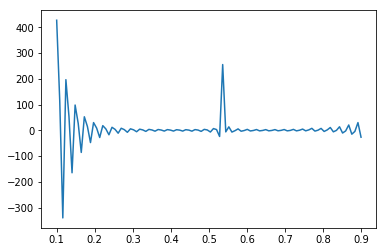

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
freqs = np.linspace(0.1,0.9,100)
plt.plot(freqs,sim.ldos_data)

In [22]:
12:7:5

1.4142135623730951

In [9]:
!rm LDOS.txt
file1 = open("LDOS.txt","a")#append mode 
for i in range(0,100):
    file1.write(str(freqs[i]))
    file1.write(" ")
    file1.write(str(sim.ldos_data[i])) 
    file1.write("\n")
file1.close()

In [ ]:
import matplotlib.pyplot as plt
plt.pcolor(sim.get_array(center=mp.Vector3(0,0,0), size=mp.Vector3(nx*ax,0,nz*az), component=mp.Ez))
plt.colorbar()
plt.show()

In [ ]:
from __future__ import division
#supercell size
nx = 7
ny = 4
nz = 3
r = 0.0725 #rod radius
n = math.sqrt(32) #rod refractive index
#lattice vectors
ax = math.sqrt(2)/2.0
ay = math.sqrt(6)/2.0
az = math.sqrt(3)
#get the geometry and cell
geometry,geometry_lattice=DiamondLattice(n,r,nx,ny,nz,ax,ay,az)
dpml = 0.5
cell = mp.Vector3(nx*ax+2*dpml,ny*ay+2*dpml,nz*az+2*dpml) 

Th = 100
resolution = 15
pml_layers = [mp.PML(dpml)]
pos = mp.Vector3(0.2,0.1,0.3)

fcen = 0.5
df = 0.8
sources = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=mp.Ez, center=pos)]
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry, eps_averaging=False,
                    boundary_layers=pml_layers,
                    sources=sources,
                    resolution=resolution)
sim.run(mp.dft_ldos(fcen, df, 100), until_after_sources=Th)
#sim.output_epsilon()

In [ ]:
sim.ldos_data

In [ ]:
#tutorial 
from __future__ import division

import math
import meep as mp
import argparse


resolution = 20
sxy = 2
dpml = 1
sxy = sxy + 2 * dpml
cell = mp.Vector3(sxy, sxy, sxy)

pml_layers = [mp.PML(dpml)]
geometry = [mp.Cylinder(0.2, material=mp.Medium(epsilon=12))]

w = 0.3
geometry.append(mp.Block(center=mp.Vector3(a / 2), size=mp.Vector3(2 * t, w, sxy),
                            material=mp.air))

fcen = math.sqrt(0.5) / a
df = 0.2
sources = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=mp.Ez,
                        center=mp.Vector3(0.1))]

symmetries = [mp.Mirror(mp.Y)]

Th = 100

sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    sources=sources,
                    symmetries=symmetries,
                    resolution=resolution)
sim.run(mp.dft_ldos(fcen, 0, 1), until_after_sources=Th)
#h = mp.Harminv(mp.Ez, mp.Vector3(), fcen, df)
#sim.run(mp.after_sources(h), until_after_sources=Th)

#m = h.modes[0]
#f = m.freq
#Q = m.Q
#Vmode = 0.25 * a * a
#print("ldos0:, {}".format(Q / Vmode / (2 * math.pi * f * math.pi * 0.5)))
